# MoodShelf 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv("./goodreads-data-50k.csv")
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,word_count,input_ids,token_type_ids,attention_mask
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,147,[ 101 160 11607 27451 11780 22157 14962 17...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,136,[ 101 1247 1110 170 1442 1120 1103 13...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,137,[ 101 1109 8362 14467 12272 5100 2165 22...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,100,[ 101 14234 2267 2596 1104 2282 4087 15...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,51,[ 101 3517 1210 1614 146 1108 7284 31...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...


## Explanatory Data Analysis

In [2]:
cols_to_keep = [
    "title",
    "author",
    "rating",
    "description",
    "language",
    "genres",
    "pages",
    "publisher",
    "publishDate",
    "numRatings",
    "likedPercent",
    "coverImg",
]

df_subset = df[cols_to_keep]
df_subset.head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...


In [3]:
duplicate_groups = df_subset[df_subset.duplicated(subset=cols_to_keep, keep=False)]

num_duplicate_groups = duplicate_groups.duplicated(subset=cols_to_keep).sum()

print(f"Number of duplicate groups: {num_duplicate_groups}")

Number of duplicate groups: 11821


In [4]:
# View the first few duplicate rows
duplicate_groups.sort_values(by=cols_to_keep).head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg
33714,"""Evil"" Arabs in American Popular Film: Orienta...",Tim Jon Semmerling,4.50,"Runner-up, 2006 Arab American National Museum ...",English,[],303,University of Texas Press,September 1st 2006,4,NaN,https://i.gr-assets.com/images/S/compressed.ph...
33715,"""Evil"" Arabs in American Popular Film: Orienta...",Tim Jon Semmerling,4.50,"Runner-up, 2006 Arab American National Museum ...",English,[],303,University of Texas Press,September 1st 2006,4,NaN,https://i.gr-assets.com/images/S/compressed.ph...
22310,"""The Mmmmmhh Thing""",K. Harvey (Goodreads Author),4.67,“The Mmmmmmhh Thing”... Is a provocative conte...,English,[],350,Luminous Events LLC,November 11th 2014,3,100.0,https://i.gr-assets.com/images/S/compressed.ph...
22311,"""The Mmmmmhh Thing""",K. Harvey (Goodreads Author),4.67,“The Mmmmmmhh Thing”... Is a provocative conte...,English,[],350,Luminous Events LLC,November 11th 2014,3,100.0,https://i.gr-assets.com/images/S/compressed.ph...
34580,"""There Are Things I Want You to Know"" about St...","Eva Gabrielsson, Marie-Françoise Colombani, Li...",3.47,Here is the real inside story—not the one abou...,English,"['Nonfiction', 'Biography', 'Memoir', 'Biograp...",209,Seven Stories Press,June 21st 2011,1348,84.0,https://i.gr-assets.com/images/S/compressed.ph...


In [5]:
# Remove duplicates and keep the first occurrence
df_subset_cleaned = df_subset.drop_duplicates(subset=cols_to_keep, keep="first")

print(f"Before: {df_subset.shape}")
print(f"After: {df_subset_cleaned.shape}")

Before: (53944, 12)
After: (42123, 12)


In [6]:
def create_histogram(x, xlabel, title):
    plt.figure(figsize=(8, 5))
    plt.hist(df_subset_cleaned[x], bins=20, edgecolor="black")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(axis="y", alpha=0.7)
    plt.tight_layout()
    plt.show()

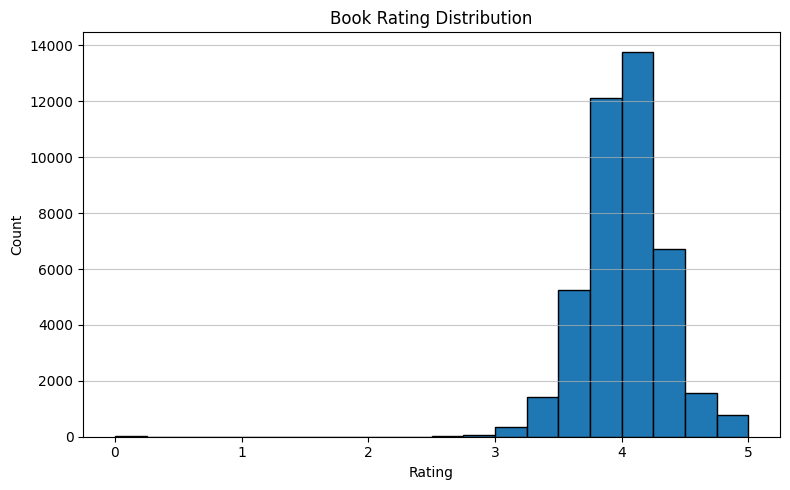

In [7]:
create_histogram(x="rating", xlabel="Rating", title="Book Rating Distribution")

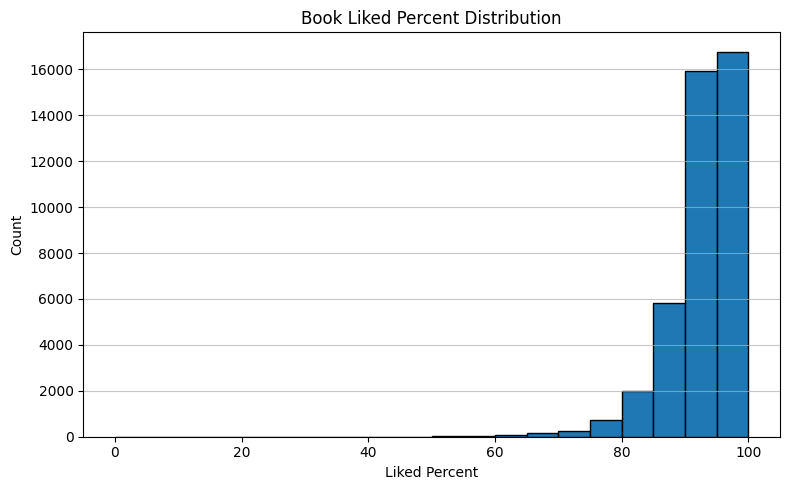

In [8]:
create_histogram(
    x="likedPercent", xlabel="Liked Percent", title="Book Liked Percent Distribution"
)

## Preprocess the Description

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt_tab")

stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)  # tokenize
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/christiandarvs/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
df_subset_cleaned["description_cleaned"] = df_subset_cleaned["description"].apply(
    preprocess_text
)

/tmp/ipykernel_34400/3898192295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_cleaned["description_cleaned"] = df_subset_cleaned["description"].apply(


In [11]:
df_subset_cleaned.head()

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg,description_cleaned
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,winning means fame fortunelosing means certain...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,door end silent corridor haunting harry pottte...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,alternate cover edition isbn since immediate s...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,three things absolutely positive first edward ...


In [12]:
"""
Return books that have:
    Ratings: 4 - 5
    Liked Percentage: 90% - 100%
    Number of Ratings: >= 250,000
"""

high_rating_and_percent = df_subset_cleaned[
    (df_subset_cleaned["rating"] >= 4)
    & (df_subset_cleaned["rating"] <= 5)
    & (df_subset_cleaned["likedPercent"] >= 90)
    & (df_subset_cleaned["likedPercent"] <= 100)
    & (df_subset_cleaned["numRatings"] >= 150_000)
]

high_rating_and_percent.sort_values(
    ascending=[False, False], by=["rating", "likedPercent"]
)
high_rating_and_percent.reset_index(drop=True)
high_rating_and_percent.to_csv("highly_rated_popular_books.csv", index=False)

## Emotion Mapping

In [13]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "j-hartmann/emotion-english-distilroberta-base"

# Use RobertaTokenizer and RobertaForSequenceClassification, NOT BertTokenizer
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)
model = model.to(device)


# Get labels
emotion_labels = [model.config.id2label[i] for i in range(model.config.num_labels)]
print("Model's Actual Emotion Labels:", emotion_labels)

/home/christiandarvs/pytorch-venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model's Actual Emotion Labels: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


In [14]:
def classify_emotions_in_batch(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i : i + batch_size]

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=128,
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)

        for prob in probs:
            # Get index of max probability
            max_idx = prob.argmax().item()
            predicted_label = emotion_labels[max_idx]
            results.append(predicted_label)
    return results

In [15]:
high_rating_and_percent["description"] = high_rating_and_percent["description"].astype(
    str
)

# Run classification
high_rating_and_percent["predicted_emotion"] = classify_emotions_in_batch(
    high_rating_and_percent["description"].tolist()
)

# Save output
high_rating_and_percent.to_csv(
    "highly_rated_popular_books_with_emotions.csv", index=False
)
print("Saved to highly_rated_popular_books_with_emotions.csv")

/tmp/ipykernel_34400/287084868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rating_and_percent["description"] = high_rating_and_percent["description"].astype(


Saved to highly_rated_popular_books_with_emotions.csv


/tmp/ipykernel_34400/287084868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rating_and_percent["predicted_emotion"] = classify_emotions_in_batch(


In [16]:
df = pd.read_csv("./highly_rated_popular_books_with_emotions.csv")
df

,title,author,rating,description,language,genres,pages,publisher,publishDate,numRatings,likedPercent,coverImg,description_cleaned,predicted_emotion
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,winning means fame fortunelosing means certain...,anger
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,door end silent corridor haunting harry pottte...,fear
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,unforgettable novel childhood sleepy southern ...,joy
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,alternate cover edition isbn since immediate s...,joy
4,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,"['Historical Fiction', 'Fiction', 'Young Adult...",552,Alfred A. Knopf,03/14/06,1834276,96.0,https://i.gr-assets.com/images/S/compressed.ph...,librarians note alternate cover edition found ...,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,The Way of Kings,Brandon Sanderson (Goodreads Author),4.63,I long for the days before the Last Desolation...,English,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",1258,Tom Doherty,May 24th 2011,303454,98.0,https://i.gr-assets.com/images/S/compressed.ph...,long days last desolation heralds abandoned us...,disgust
586,The Giver of Stars,Jojo Moyes (Goodreads Author),4.28,"From the author of Me Before You, set in Depre...",English,"['Historical Fiction', 'Fiction', 'Audiobook',...",388,Pamela Dorman Books,October 8th 2019,183231,97.0,https://i.gr-assets.com/images/S/compressed.ph...,author set depressionera america breathtaking ...,fear
587,City of Girls,Elizabeth Gilbert (Goodreads Author),4.04,"""Life is both fleeting and dangerous, and ther...",English,"['Historical Fiction', 'Fiction', 'Audiobook',...",496,Riverhead Books,April 7th 2020,157326,95.0,https://i.gr-assets.com/images/S/compressed.ph...,life fleeting dangerous point denying pleasure...,sadness
588,The Way of Kings,Brandon Sanderson (Goodreads Author),4.63,From #1 New York Times bestselling author Bran...,English,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",1137,Tor Books,August 31st 2010,304529,98.0,https://i.gr-assets.com/images/S/compressed.ph...,new york times bestselling author brandon sand...,neutral


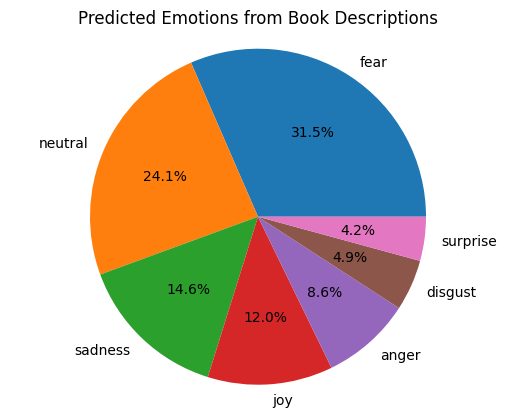

predicted_emotion
fear        186
neutral     142
sadness      86
joy          71
anger        51
disgust      29
surprise     25
Name: count, dtype: int64


In [17]:
emotion_counts = df["predicted_emotion"].value_counts()

# Plot with correct label order
plt.pie(emotion_counts, labels=emotion_counts.index, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Predicted Emotions from Book Descriptions")
plt.show()

# Print raw counts
print(emotion_counts)

In [18]:
print(
    f'The Shining Description: {df[df["title"] == "The Shining"].description_cleaned.values}'
)

print(
    f'\nThe Shining Prediction Emotion: {df[df["title"] == "The Shining"].predicted_emotion}'
)

The Shining Description: ['jack torrances new job overlook hotel perfect chance fresh start offseason caretaker atmospheric old hotel hell plenty time spend reconnecting family working writing harsh winter weather sets idyllic location feels ever remoteand sinister one notice strange terrible forces gathering around overlook danny torrance uniquely gifted fiveyearoldthe shiningstephen king goodreads authorthe shining shiningstephen king goodreads authorthe shining']

The Shining Prediction Emotion: 80    fear
Name: predicted_emotion, dtype: object


In [19]:
book_emotions = (
    df.groupby("title")["predicted_emotion"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)


book_emotions = book_emotions.reindex(columns=emotion_labels, fill_value=0)

print("Emotional Fingerprints:")
display(book_emotions)

Emotional Fingerprints:


predicted_emotion,anger,disgust,fear,joy,neutral,sadness,surprise
title,,,,,,,
'Salem's Lot,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11/22/63,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1984,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1st to Die,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Wool Omnibus,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Words of Radiance,0.0,0.0,0.0,0.0,0.0,1.0,0.0
World War Z: An Oral History of the Zombie War,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def recommend_books(user_emotion_vector, book_emotions_df, full_df, top_n=10):
    book_vectors = book_emotions_df[emotion_labels].values
    similarities = cosine_similarity([user_emotion_vector], book_vectors)

    similar_books_idx = np.argsort(similarities[0])[::-1]
    top_indices = similar_books_idx[:top_n]
    top_titles = book_emotions_df.index[top_indices]

    # Filter the original DataFrame and reset index
    recommended_books_df = (
        full_df[full_df["title"].isin(top_titles)]
        .drop_duplicates(subset="title")
        .reset_index(drop=True)
    )

    # Sort by recommendation order
    recommended_books_df["title_order"] = recommended_books_df["title"].apply(
        lambda x: list(top_titles).index(x)
    )
    recommended_books_df = (
        recommended_books_df.sort_values("title_order")
        .drop(columns="title_order")
        .reset_index(drop=True)
    )

    return recommended_books_df

In [23]:
user_input = [
    0.0,  # anger
    0.0,  # disgust
    1.0,  # fear
    0.0,  # joy
    0.0,  # neutral
    0.0,  # sadness
    0.0,  # surprise
]


top_10_books = recommend_books(user_input, book_emotions, df, top_n=10)

for idx, row in top_10_books.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Author: {row['author']}")
    print(f"Rating: {row['rating']}")
    print(f"Description: {row['description']}")
    print(f"Language: {row['language']}")
    print(f"Genres: {row['genres']}")
    print(f"Pages: {row['pages']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Publish Date: {row['publishDate']}")
    print(f"Number of Ratings: {row['numRatings']}")
    print(f"Liked Percent: {row['likedPercent']}")
    print(f"Cover Image URL: {row['coverImg']}")


Title: 'Salem's Lot
Author: Stephen King (Goodreads Author)
Rating: 4.03
Description: Thousands of miles away from the small township of 'Salem's Lot, two terrified people, a man and a boy, still share the secrets of those clapboard houses and tree-lined streets. They must return to 'Salem's Lot for a final confrontation with the unspeakable evil that lives on in the town.'Salem's LotStephen King (Goodreads Author)'Salem's LotStephen King (Goodreads Author)
Language: English
Genres: ['Horror', 'Fiction', 'Vampires', 'Fantasy', 'Thriller', 'Paranormal', 'Supernatural', 'Audiobook', 'Adult', 'Mystery']
Pages: 483
Publisher: New English Library
Publish Date: 10/28/91
Number of Ratings: 334051
Liked Percent: 94.0
Cover Image URL: https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1327891565l/11590.jpg

Title: 1984
Author: George Orwell
Rating: 4.19
Description: Among the seminal texts of the 20th century, Nineteen Eighty-Four is a rare work that grows more haunting as i